### Correct Annotations
----

In [80]:
import numpy as np
import os, sys, json
import PIL
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

img_dir = '../../../rf-chess-data/roboflow/export/'
img_fns = os.listdir(img_dir)

annotate_fn = '_annotations.coco.json'

with open(Path(img_dir, annotate_fn), 'r') as f:
    d_annotate = json.load(f)
    
d_annotate.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [81]:
label2id = {cat['name']: cat['id'] for cat in cats}
id2label = {cat['id']: cat['name'] for cat in cats}

In [82]:
label2id['black-knight'], id2label[3]

(3, 'black-knight')

In [83]:
changes = [
('01155_black-bishop.jpg', 'black-knight'),
('00392_black-bishop.jpg', 'black-rook'),
('00393_black-bishop.jpg', 'black-rook'),
('01154_black-bishop.jpg', 'black-knight'),
('02398_black-bishop.jpg', 'white-bishop'),
('00847_black-knight.jpg', 'black-bishop'),
('00552_black-knight.jpg', 'black-king'),
('02621_black-knight.jpg', 'black-bishop'),
('01594_black-rook.jpg', 'black-knight'),
('00928_black-rook.jpg', 'black-knight'),
('00927_black-rook.jpg', 'black-knight'),
('01877_black-rook.jpg', 'white-rook'),
('00513_white-bishop.jpg', 'white-rook'),
('01302_white-knight.jpg', 'black-knight'),
('02627_white-knight.jpg', 'black-knight'),
('02626_white-knight.jpg', 'black-knight'),
('01235_white-queen.jpg', 'white-king'),
('00223_white-rook.jpg', 'black-rook'),
('00224_white-rook.jpg', 'black-rook'),
('01346_white-rook.jpg', 'white-knight'),
('01712_white-rook.jpg', 'white-knight'),
('01711_white-rook.jpg', 'white-knight')]

In [84]:
d_annotate['annotations']

[{'id': 0,
  'image_id': 0,
  'category_id': 10,
  'bbox': [959, 767, 107, 161],
  'area': 17227,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 1,
  'image_id': 1,
  'category_id': 5,
  'bbox': [1127, 229, 129, 257],
  'area': 33153,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 2,
  'image_id': 2,
  'category_id': 4,
  'bbox': [1163, 614, 104, 154],
  'area': 16016,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 3,
  'image_id': 3,
  'category_id': 10,
  'bbox': [565, 172, 133, 167],
  'area': 22211,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 4,
  'image_id': 3,
  'category_id': 7,
  'bbox': [946, 552, 137, 214],
  'area': 29318,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 5,
  'image_id': 3,
  'category_id': 8,
  'bbox': [292, 311, 175, 314],
  'area': 54950,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 6,
  'image_id': 3,
  'category_id': 11,
  'bbox': [721, 94, 144, 273],
  'area': 39312,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 7,
  'image_id': 3,
  'category_id':

In [85]:
len(d_annotate['annotations'])

2870

##### Alter annotations tables

In [86]:
annots = d_annotate['annotations'].copy()

In [87]:
annots[1155]

{'id': 1155,
 'image_id': 113,
 'category_id': 1,
 'bbox': [1294, 405, 133, 215],
 'area': 28595,
 'segmentation': [],
 'iscrowd': 0}

In [88]:
change_inds = [int(change[0].split('_')[0]) for change in changes]

In [89]:
change_newlabel = [change[1] for change in changes]

In [90]:
for ind, label in zip(change_inds, change_newlabel):
    annots[ind]['category_id'] = label2id[label]

In [91]:
annots == annots

True

In [92]:
annots[1155]

{'id': 1155,
 'image_id': 113,
 'category_id': 3,
 'bbox': [1294, 405, 133, 215],
 'area': 28595,
 'segmentation': [],
 'iscrowd': 0}

In [93]:
d_annotate['annotations'] = annots.copy()

In [94]:
with open('_annotations_v2.coco.json', 'w') as f:
    json.dump(d_annotate, f, indent=4)

##### Verify

In [54]:
ind = change_inds[0]
bad_annot = annots[ind]
bad_annot

{'id': 1155,
 'image_id': 113,
 'category_id': 1,
 'bbox': [1294, 405, 133, 215],
 'area': 28595,
 'segmentation': [],
 'iscrowd': 0,
 'categoryu_id': 3}

In [20]:
id2label[bad_annot['category_id']]

'black-bishop'

In [24]:
id2imgfn = {e['id']:e['file_name'] for e in d_annotate['images']}

In [25]:
id2imgfn[2]

'03886821377011fec599e8fa12d86e89.jpg'

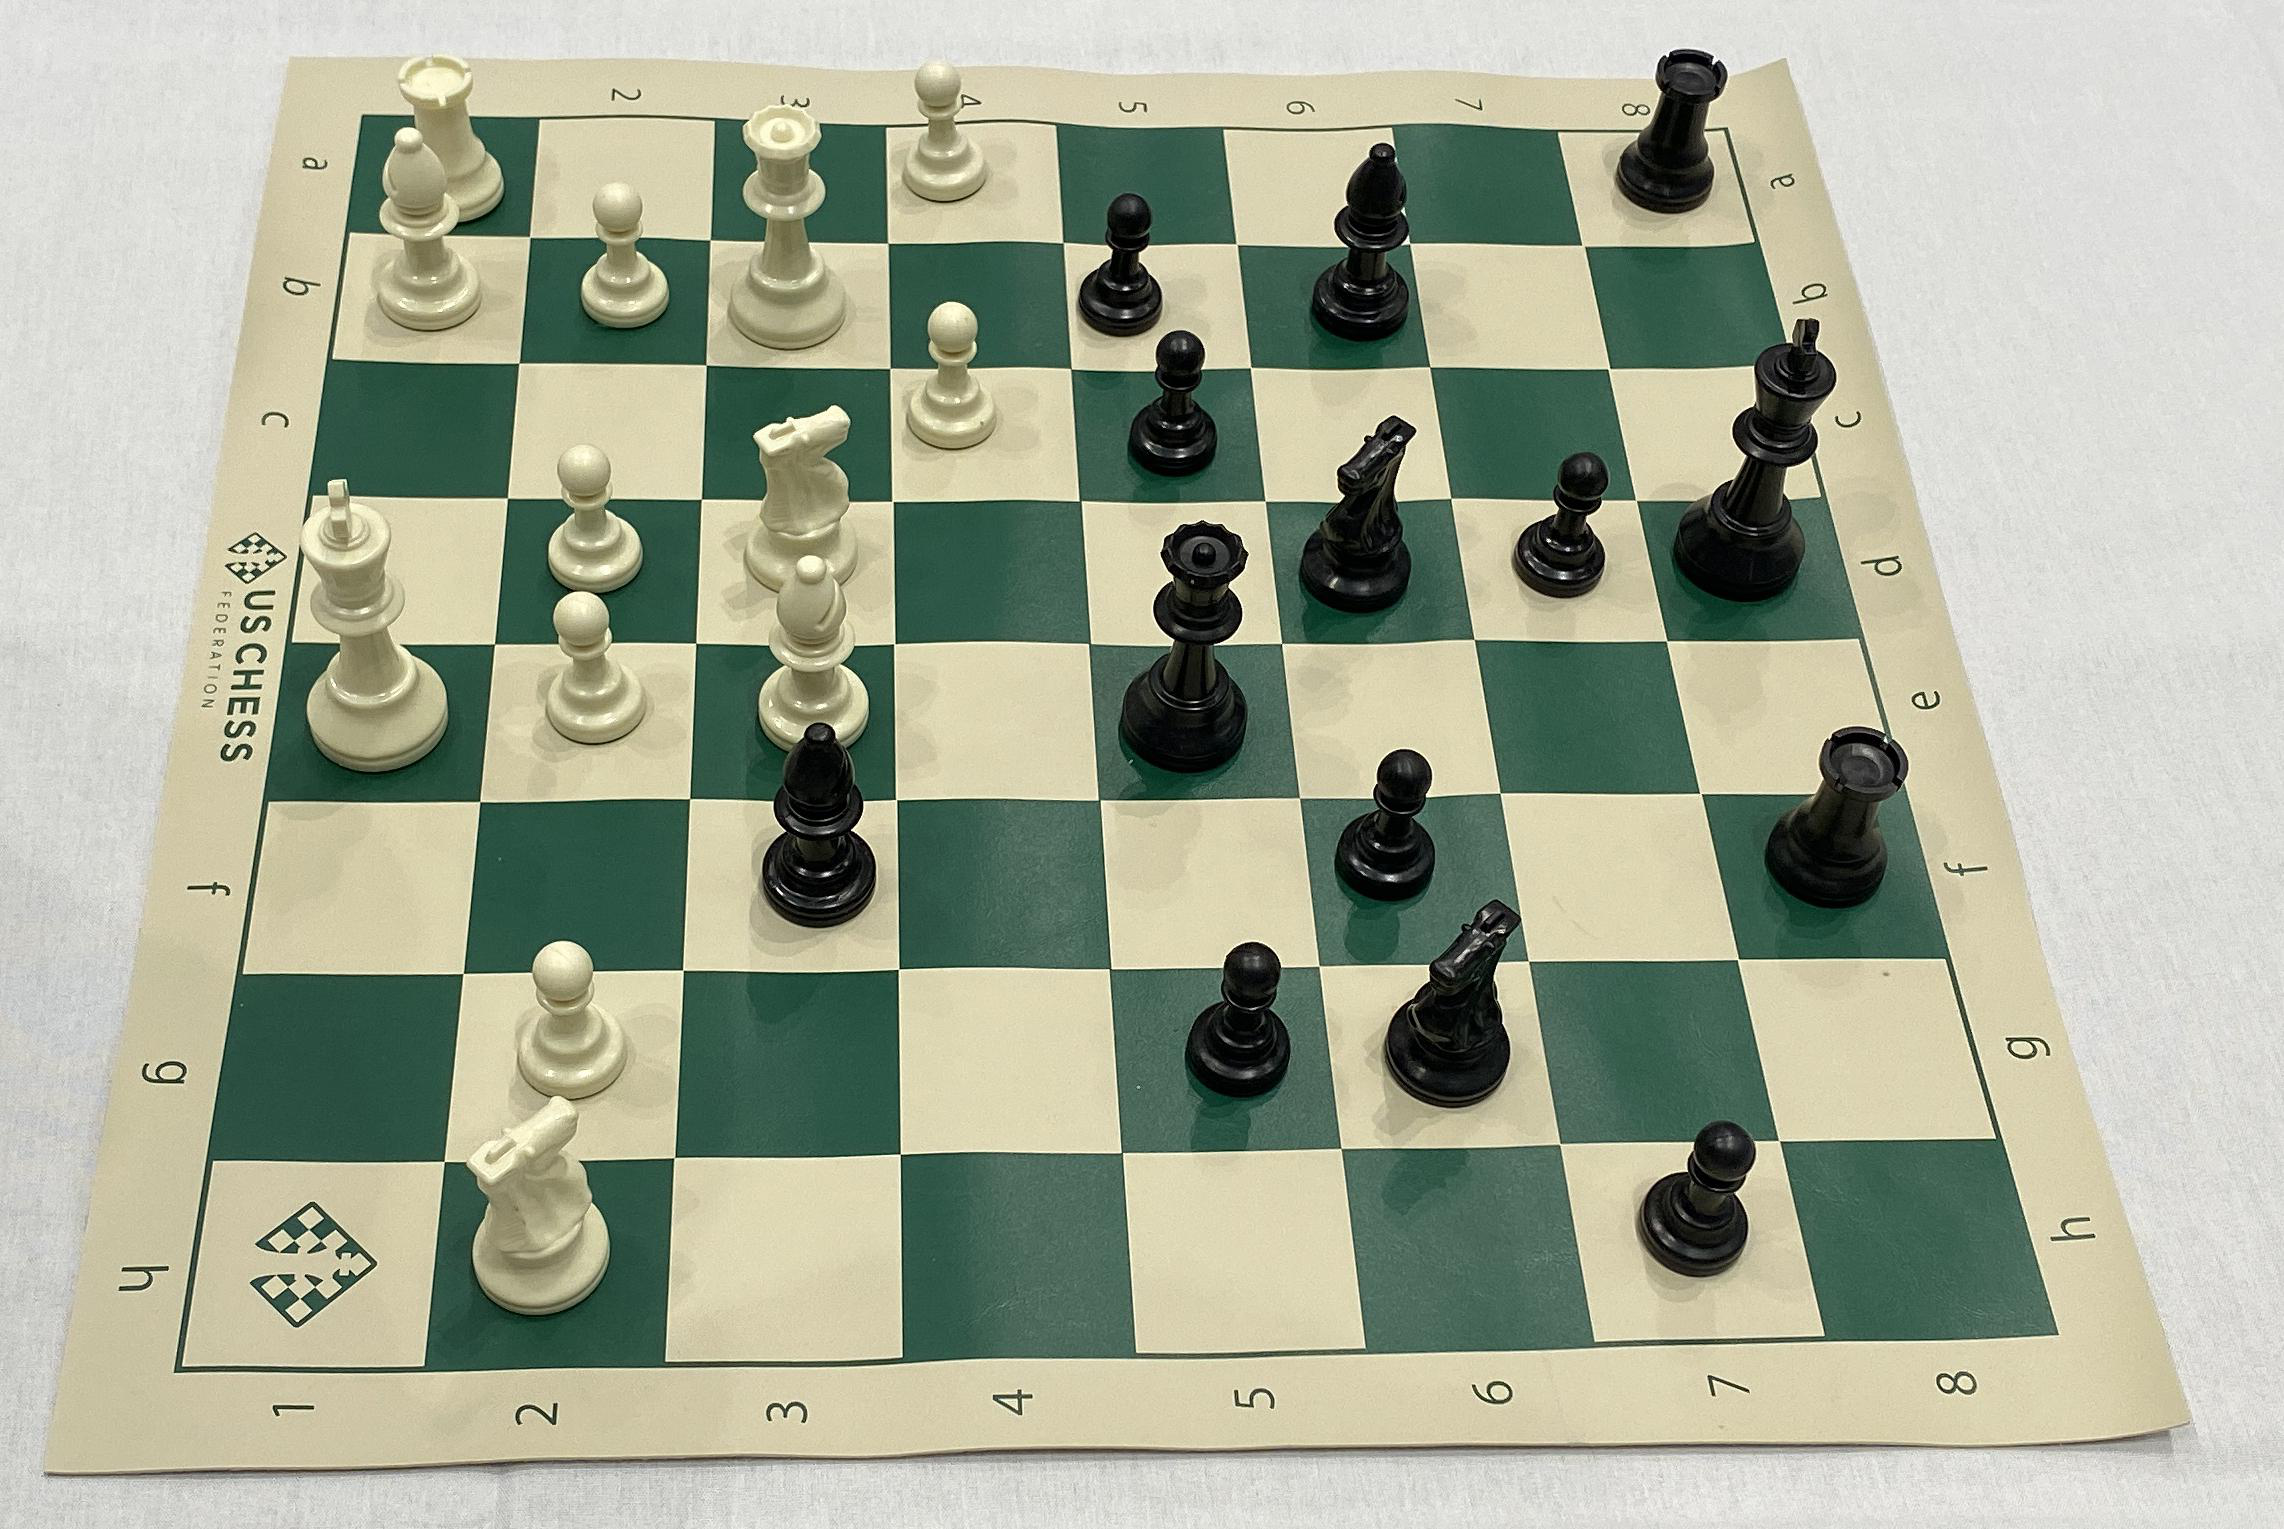

In [29]:
img = PIL.Image.open(img_dir + id2imgfn[bad_annot['image_id']])
img

In [30]:
np_img = np.array(img)

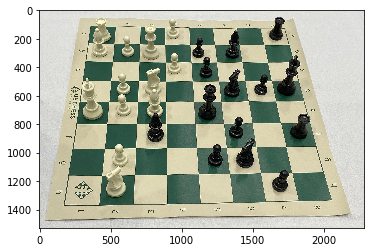

In [38]:
plt.imshow(np_img)

In [37]:
bbox = bad_annot['bbox']
print(bbox)
lx, ly, w, h = bbox
crop_img = np_img[ly:ly+h,lx:lx+w ,:]

[1294, 405, 133, 215]


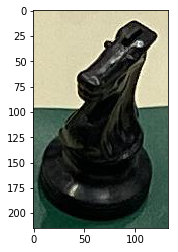

In [36]:
plt.imshow(crop_img)

This is labelled as black-bishop and we change the label to black-knight

### Old Stuff below -----

##### Pandas: annotations left joined to images `df_join`

In [9]:
df_annotate = pd.DataFrame(d_annotate['annotations'])
df_annotate.head(3)

id  image_id  category_id                   bbox   area segmentation  \
0   0         0           10   [959, 767, 107, 161]  17227           []   
1   1         1            5  [1127, 229, 129, 257]  33153           []   
2   2         2            4  [1163, 614, 104, 154]  16016           []   

   iscrowd  
0        0  
1        0  
2        0

In [10]:
df_images = pd.DataFrame(d_annotate['images'])
df_images.head(3)

id  license                             file_name  height  width  \
0   0        1  0301b7f9ed4d5ba503fda79fc4370c29.jpg    1529   2284   
1   1        1  00bc0cacffdebe6b11bdeec56f63ee49.jpg    1529   2284   
2   2        1  03886821377011fec599e8fa12d86e89.jpg    1529   2284   

               date_captured  
0  2020-02-11T17:18:56+00:00  
1  2020-02-11T17:18:56+00:00  
2  2020-02-11T17:18:56+00:00

In [11]:
df_categories = pd.DataFrame(d_annotate['categories'])
df_categories.head(3)

id          name supercategory
0   0        pieces          none
1   1  black-bishop        pieces
2   2    black-king        pieces

In [13]:
df_join = pd.merge(df_annotate, 
                   df_images,
                   how='left',
                   left_on='image_id',
                   right_on='id'
                  )

In [14]:
print(df_images.shape, df_annotate.shape, df_join.shape)

(289, 6) (2870, 7) (2870, 13)


In [15]:
df_join.head(3)

id_x  image_id  category_id                   bbox   area segmentation  \
0     0         0           10   [959, 767, 107, 161]  17227           []   
1     1         1            5  [1127, 229, 129, 257]  33153           []   
2     2         2            4  [1163, 614, 104, 154]  16016           []   

   iscrowd  id_y  license                             file_name  height  \
0        0     0        1  0301b7f9ed4d5ba503fda79fc4370c29.jpg    1529   
1        0     1        1  00bc0cacffdebe6b11bdeec56f63ee49.jpg    1529   
2        0     2        1  03886821377011fec599e8fa12d86e89.jpg    1529   

   width              date_captured  
0   2284  2020-02-11T17:18:56+00:00  
1   2284  2020-02-11T17:18:56+00:00  
2   2284  2020-02-11T17:18:56+00:00

In [ ]:
np.sqrt()

##### Validity Checks + EDA

 - are all images the same size? -> yes
 - what is the smallest piece, the largest piece? -> 107 - 273 px^(1/2)
 - average piece size? -> 160 px^2
 - transfrom bbox -> 4cols?
 - how to find occlusions with bounding boxes?
 - summarize high level facts on data:
 
```   
   ~ 3,000 annotations on ~300 images
   of C classes, with a roughly balanced (?) incidience
   
```

In [22]:
df_join.isnull().sum().sum()

0

In [23]:
df_join['iscrowd'].sum()

0

In [24]:
df_join['height'].min(), df_join['height'].max()

(1529, 1529)

In [25]:
df_join['width'].min(), df_join['width'].max()

(2284, 2284)

min: 107.0
max: 273.0
mean: 166.0


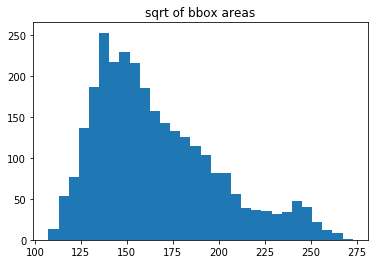

In [86]:
areas = np.sqrt(df_join['area'])

msg =  f"min: {round(areas.min(),0)}\n"
msg += f"max: {round(areas.max(),0)}\n"
msg += f"mean: {round(areas.mean(),0)}"
print(msg)

plt.hist(areas,bins=30);
plt.title('sqrt of bbox areas');

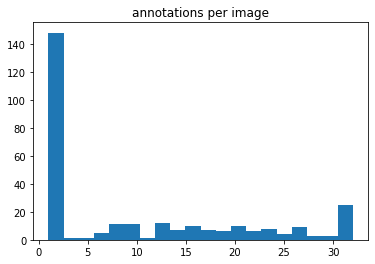

In [47]:
ann_per_img = (df_join.groupby(['image_id'])
               .agg(['count']).iloc[:,0])
plt.hist(ann_per_img, bins=20)
plt.title('annotations per image');

In [70]:
ann_per_class = pd.DataFrame(
                 df_join.groupby(['category_id'])
                 .agg(['count']).iloc[:,0])

ann_per_class.columns = (ann_per_class.columns
                         .get_level_values(1))

ann_per_class = ann_per_class.join(
                    df_categories.set_index('id'))

In [81]:
tmp = ann_per_class.sort_values(by='count', 
                                ascending=False)
tmp

count          name supercategory
category_id                                   
4              659    black-pawn        pieces
10             639    white-pawn        pieces
6              201    black-rook        pieces
3              196  black-knight        pieces
9              184  white-knight        pieces
12             184    white-rook        pieces
7              172  white-bishop        pieces
8              149    white-king        pieces
2              147    black-king        pieces
1              141  black-bishop        pieces
11             111   white-queen        pieces
5               87   black-queen        pieces

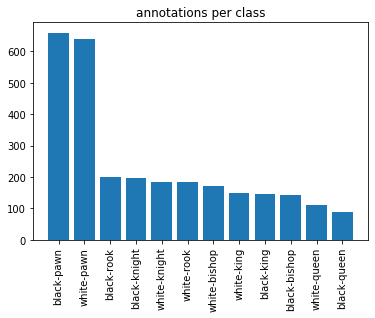

In [82]:
plt.bar(x=tmp['name'],
        height=tmp['count'])
plt.title('annotations per class')
plt.xticks(rotation='vertical');

##### Build some example rows to process

In [18]:
N = 10
example_rows = df_join[df_join['image_id'] < N]
print(example_rows.shape)
example_rows.head(3)

(80, 13)


id_x  image_id  category_id                   bbox   area segmentation  \
0     0         0           10   [959, 767, 107, 161]  17227           []   
1     1         1            5  [1127, 229, 129, 257]  33153           []   
2     2         2            4  [1163, 614, 104, 154]  16016           []   

   iscrowd  id_y  license                             file_name  height  \
0        0     0        1  0301b7f9ed4d5ba503fda79fc4370c29.jpg    1529   
1        0     1        1  00bc0cacffdebe6b11bdeec56f63ee49.jpg    1529   
2        0     2        1  03886821377011fec599e8fa12d86e89.jpg    1529   

   width              date_captured  
0   2284  2020-02-11T17:18:56+00:00  
1   2284  2020-02-11T17:18:56+00:00  
2   2284  2020-02-11T17:18:56+00:00

##### Example cropping

In [26]:
row = example_rows.iloc[0,:]
row

id_x                                                0
image_id                                            0
category_id                                        10
bbox                             [959, 767, 107, 161]
area                                            17227
segmentation                                       []
iscrowd                                             0
id_y                                                0
license                                             1
file_name        0301b7f9ed4d5ba503fda79fc4370c29.jpg
height                                           1529
width                                            2284
date_captured               2020-02-11T17:18:56+00:00
Name: 0, dtype: object

(1529, 2284, 3)


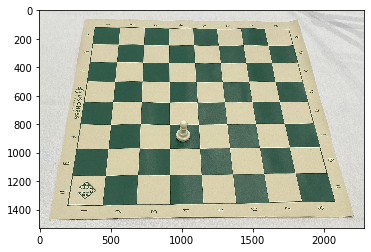

In [29]:
img_fn = row['file_name']
img_pil = PIL.Image.open(Path(img_dir, img_fn))
img_np = np.array(img_pil)
print(img_np.shape)
plt.imshow(img_np);

In [30]:
bbox = row['bbox']
lx, ly, w, h = bbox
crop_img = img_np[ly:ly+h,lx:lx+w ,:]

(161, 107, 3)


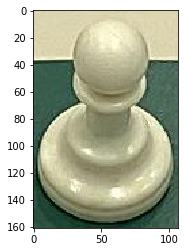

In [32]:
print(crop_img.shape)
plt.imshow(crop_img);

##### Demo cropping pipeline

In [125]:
def load_np_img(img_fn):
    img_pil = PIL.Image.open(Path(img_dir, img_fn))
    img_np = np.array(img_pil)
    return img_np

def crop_img(img, bbox):
    lx, ly, w, h = bbox
    return img[ly:ly+h,lx:lx+w ,:] 

In [133]:
crop_imgs, class_names = [], []

for _i in range(len(example_rows)):
    
    _row = example_rows.iloc[_i,:]
    
    img = load_np_img(_row['file_name'])
    
    img_cropped = crop_img(img, _row['bbox'])
    
    crop_imgs.append(img_cropped)
    class_names.append(_row['category_id'])


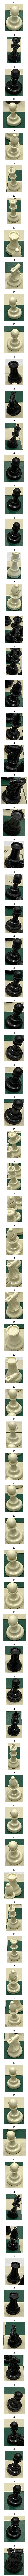

In [138]:
n = len(crop_imgs[:80])

fig, ax = plt.subplots(nrows=n, ncols=1, figsize=(6, n*3))

for _i, (_img, _catid) in enumerate(
                            zip(crop_imgs, class_names)):
    ax[_i].imshow(_img)
    ax[_i].axis('off')
    ax[_i].title.set_text(str(_catid))
    
    if _i > n:
        break